Information about map: EDT                 
==================================

Map name (internal)     : EDT000
Sounding set (internal) : 0
RS-Number               : J1843008
Data record length      : 40 bytes
Number of data records  : 789
Max filemap size        : 789 bytes
Data header size        : 12504 bytes
Free space in map       : -43275 bytes (107373100 records)
Status flag (not used)  : 1


   Record name:    Unit:           Data type:          Divisor: Offset:
   ---------------------------------------------------------------------
    time            sec             float (4)          1        0       
    Pscl            ln              short (2)          1        0       
    T               K               short (2)          10       0       
    RH              %               short (2)          1        0       
    v               m/s             short (2)          -100     0       
    u               m/s             short (2)          -100     0       
    Height          m               short (2)          1        30000   
    P               hPa             short (2)          10       0       
    TD              K               short (2)          10       0       
    MR              g/kg            short (2)          100      0       
    DD              dgr             short (2)          1        0       
    FF              m/s             short (2)          10       0       
    AZ              dgr             short (2)          1        0       
    Range           m               short (2)          0.01     0       
    Lon             dgr             short (2)          100      0       
    Lat             dgr             short (2)          100      0       
    SpuKey          bitfield        unsigned short (2) 1        0       
    UsrKey          bitfield        unsigned short (2) 1        0       
    RadarH          m               short (2)          1        30000   


In [1]:
import numpy as np

In [2]:
def read_export(filename, skip=0):
    data = np.loadtxt(filename, dtype=[('time','f4'), ('Pscl','f4'), 
                                       ('T','f4'), ('RH','f4'),
                                       ('v','f4'), ('u','f4'),
                                       ('Height','f4'), ('P','f4'), 
                                       ('TD','f4'), ('MR','f4'),
                                       ('wdir','f4'), ('wspd','f4'),
                                       ('AZ','f4'), ('Range','f4'),
                                       ('Lon','f4'), ('Lat','f4'),
                                       ('SpuKey','f4'), ('UsrKey','f4'),
                                       ('RadarH','f4'),
                                       ], skiprows=skip)
    return data
        
    

In [11]:
#import appropriate .tsv for plotting, downloaded directly from sounding laptop
filename = './150710.tsv'
data=read_export(filename,skip=40)
import os
pathparts = os.path.split(filename)

In [4]:
from metpy.units import units
from metpy.calc import dewpoint_rh, get_wind_components
from scipy.constants import K2C

In [5]:
#define variables used in calculation for plots
p = data['P']
T = K2C(data['T'])
RH = data['RH']#/100.0
Td = K2C(data['TD'])#dewpoint_rh(T,RH)
u, v = get_wind_components(data['wspd'], data['wdir']*units.deg)
u /= 0.514
v /= 0.514

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

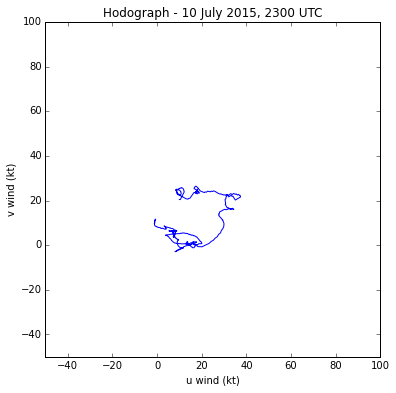

In [7]:
#plotting the hodograph
hodo = plt.figure(figsize=(6,6))
hodo_ax = hodo.add_subplot(111)
hodo_mask = (p>200) &(p<891.0002441)
hodo_ax.plot(u[hodo_mask],v[hodo_mask])
hodo_ax.axis((-50,100, -50,100))
hodo_ax.set_xlabel('u wind (kt)')
hodo_ax.set_ylabel('v wind (kt)')
#change title depending on location and time of launch
title = 'Hodograph - 10 July 2015, 2300 UTC'
hodo_ax.set_title(title)
hodo_ax.figure.savefig(title+'.png')

In [8]:
from metpy.plots.skewt import SkewT

In [9]:
import metpy
print metpy.__file__

import sys
print sys.path
import os
print os.curdir

metpy/__init__.pyc
['', '/Users/sberkset/code', '/Users/sberkset/MetPy', '/Users/sberkset/anaconda/lib/python27.zip', '/Users/sberkset/anaconda/lib/python2.7', '/Users/sberkset/anaconda/lib/python2.7/plat-darwin', '/Users/sberkset/anaconda/lib/python2.7/plat-mac', '/Users/sberkset/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/sberkset/anaconda/lib/python2.7/lib-tk', '/Users/sberkset/anaconda/lib/python2.7/lib-old', '/Users/sberkset/anaconda/lib/python2.7/lib-dynload', '/Users/sberkset/anaconda/lib/python2.7/site-packages/cryptography-0.8-py2.7-macosx-10.5-x86_64.egg', '/Users/sberkset/anaconda/lib/python2.7/site-packages/setuptools-17.0-py2.7.egg', '/Users/sberkset/anaconda/lib/python2.7/site-packages', '/Users/sberkset/anaconda/lib/python2.7/site-packages/PIL', '/Users/sberkset/anaconda/lib/python2.7/site-packages/Sphinx-1.2.3-py2.7.egg', '/Users/sberkset/anaconda/lib/python2.7/site-packages/aeosa', '/Users/sberkset/anaconda/lib/python2.7/site-packages/IPython/extension

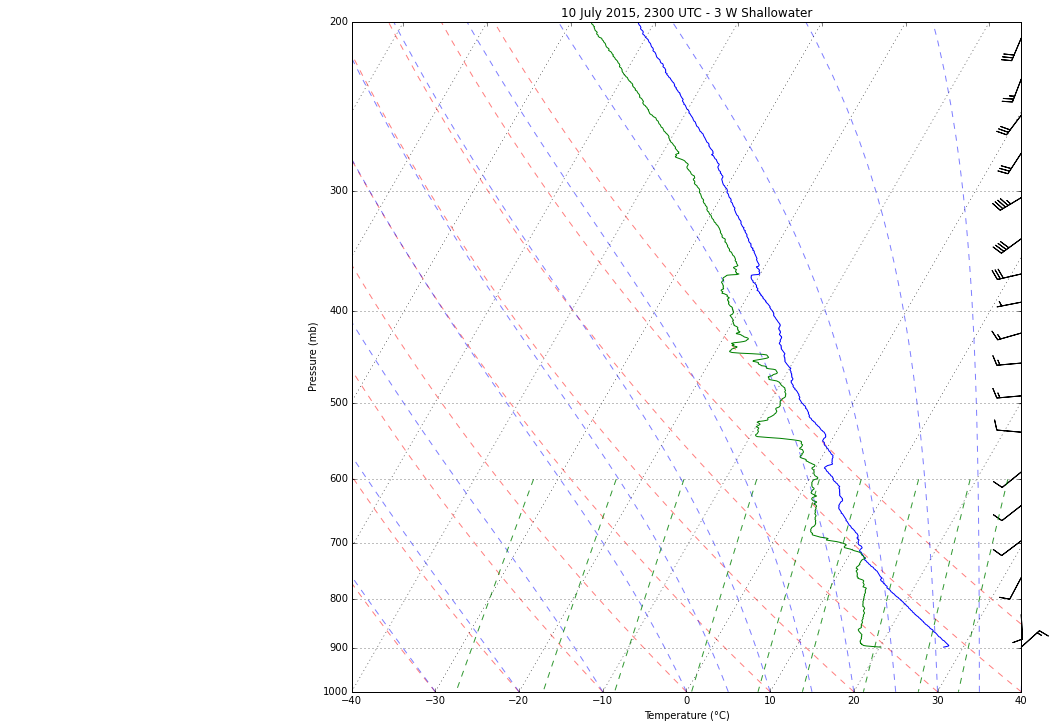

In [10]:
#plotting the skew-t
skewt = SkewT(plt.figure(figsize=(12,12)), 30)
skewt.plot(p, T, 'b')
skewt.plot(p, Td, 'g')
barb_mask = slice(None,None,50)
p_mask = p > 200
skewt.plot_barbs(p[p_mask][barb_mask],u[p_mask][barb_mask],v[p_mask][barb_mask])
skewt.plot_dry_adiabats()
skewt.plot_moist_adiabats()
skewt.plot_mixing_lines()
#change title depending on location and time of launch
title = '10 July 2015, 2300 UTC - 3 W Shallowater'
skewt.ax.set_title(title)
skewt.ax.axis((-40, 40, 1000, 200))
skewt.ax.set_xlabel(u'Temperature (°C)')
skewt.ax.set_ylabel(u'Pressure (mb)')
skewt.ax.figure.savefig(title+'.png')